In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

%matplotlib inline

In [18]:
iris = load_iris()

In [19]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [20]:
len(iris.data)

150

In [21]:
features = pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.DataFrame(iris.target, columns=["TARGET"]) 
dataset = pd.concat([features, target], axis=1)
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),TARGET
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [22]:
X = iris.data
y = iris.target

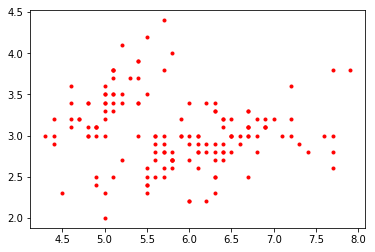

In [79]:
plt.plot(features["sepal length (cm)"], features["sepal width (cm)"], 'r.')

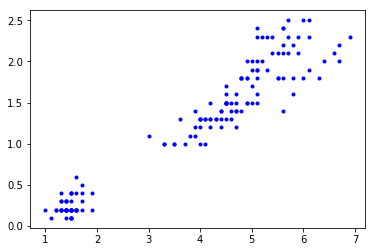

In [80]:
plt.plot(features["petal length (cm)"], features["petal width (cm)"], 'b.')

In [23]:
# n = int(0.8 * len(X))

# X_train = X[:n]
# Y_train = X[:n]

# X_test = X[n:]
# Y_test = Y[n:]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
def euclidian_distance(l1, l2):
    if (len(l1) == len(l2)):
        dist = 0
        for i in range(len(l1)):
            dist = dist + np.power((l1[i] - l2[i]), 2)
        return np.power(dist, 0.5)
    else:
        raise ValueError("Length is not equal")

In [42]:
k = 20

In [43]:
def euclideanDistance(l1, l2):
    if (len(l1) == len(l2)):
        dist = 0
        for i in range(len(l1)):
            dist += (l1[i] - l2[i])**2
        return dist**0.5

In [72]:
y_test_predict = [] # target yang diprediksi

for x_unknown in X_test:
    neighbors_distance = []
    
    for i, x_known in enumerate(X_train):
        neighbors_distance.append(euclideanDistance(x_unknown, x_known))
#         if i % 50 == 0:
#             print(f"X_train: {x_known}, X_test: {x_unknown}, neighbors_distance: {neighbors_distance}")
#             print("\n\n")
#     print(sorted(neighbors_distance))

    neighbors_distance_sorted_with_target = sorted(zip(neighbors_distance, y_train))
#     print("\n\n\n")
#     print(f"neighbors_distance_sorted_with_target:{neighbors_distance_sorted_with_target}")
#     print("\n\n\n")
    
    k_nearest_neighbors_target = [items[1] for items in neighbors_distance_sorted_with_target[:k]]
#     print(f"k_nearest_neighbors_target: {k_nearest_neighbors_target}")
#     print("\n\n\n")
#     print("Taking Next test value")

    # mode of knn : classification
#     print(max(set(k_nearest_neighbors_target)))
    key=k_nearest_neighbors_target.count
    y_test_predict.append(max(set(k_nearest_neighbors_target), key=k_nearest_neighbors_target.count))
    print(y_test_predict)

print (y_test_predict)

[2]
[2, 0]
[2, 0, 1]
[2, 0, 1, 1]
[2, 0, 1, 1, 0]
[2, 0, 1, 1, 0, 0]
[2, 0, 1, 1, 0, 0, 0]
[2, 0, 1, 1, 0, 0, 0, 1]
[2, 0, 1, 1, 0, 0, 0, 1, 1]
[2, 0, 1, 1, 0, 0, 0, 1, 1, 0]
[2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2]
[2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2]
[2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0]
[2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1]
[2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2]
[2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1]
[2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1, 2]
[2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0]
[2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 1]
[2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 1, 0]
[2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 1, 0, 1]
[2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 1, 0, 1, 2]
[2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 1, 0, 1, 2, 2]
[2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 2]
[2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 2, 0]


In [78]:
n_benar = 0
n_test = len(y_test)
for i in range(n_test):
    if (y_test_predict[i] == y_test[i]):
        n_benar += 1
print((n_benar/n_test)*100)

93.33333333333333


In [92]:
from matplotlib.colors import ListedColormap
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

ValueError: not enough values to unpack (expected 2, got 1)

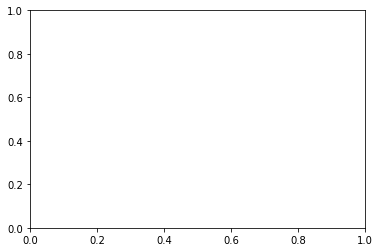

In [101]:
plt.figure()
plt.pcolormesh(X, y, y_test_predict, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()

In [100]:
# import matplotlib
# matplotlib.use('GTKAgg')
 
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# from sklearn import neighbors, datasets
 
# n_neighbors = 6
 
# # import some data to play with
# iris = datasets.load_iris()
 
# # prepare data
# X = iris.data[:, :2]  
# y = iris.target
# h = .02 
 
# # Create color maps
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
# cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
 
# # we create an instance of Neighbours Classifier and fit the data.
# clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
# clf.fit(X, y)
 
# # calculate min, max and limits
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))


# # predict class using data and kNN classifier
# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# print(len(Z))
